In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('placement1.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='Density'>

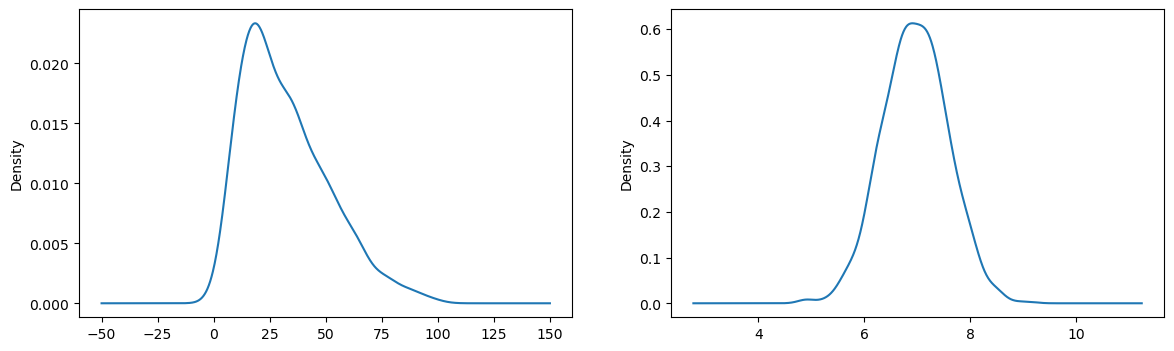

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize= (14,4))
plt.subplot(121)
df['placement_exam_marks'].plot(kind='kde')

plt.subplot(122)
df['cgpa'].plot(kind= 'kde')

<Axes: xlabel='placement_exam_marks'>

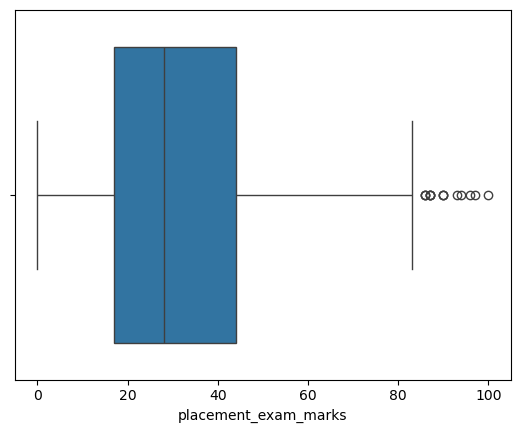

In [7]:
sns.boxplot(x =df['placement_exam_marks'])


In [8]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
IQR = percentile75 - percentile25
IQR

27.0

In [9]:
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25  - 1.5*IQR
upper_limit

84.5

In [10]:
#trimming:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape


(985, 3)

##### Capping :

In [12]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
    new_df_cap['placement_exam_marks']< lower_limit,
    lower_limit,
    new_df_cap['placement_exam_marks'])
)

In [13]:
new_df_cap.shape

(1000, 3)

<Axes: ylabel='Density'>

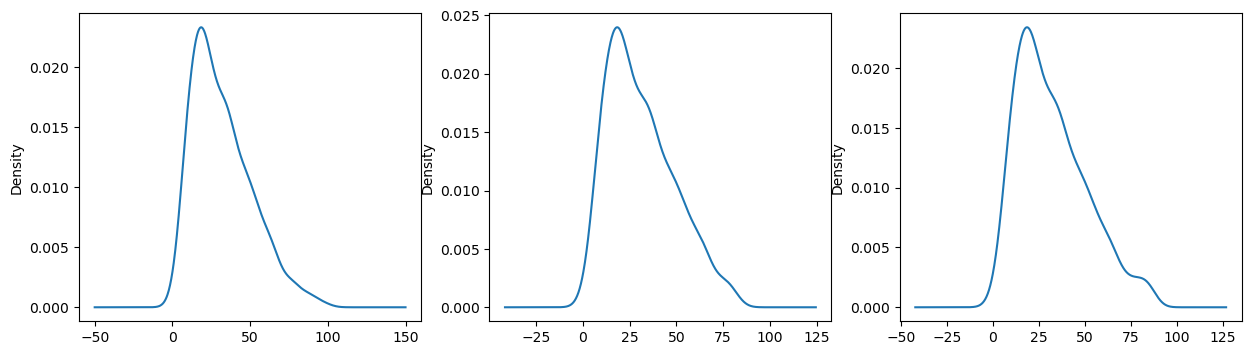

In [16]:
# comparision:
plt.figure(figsize= (15,4))

plt.subplot(131)
df['placement_exam_marks'].plot(kind= 'kde')

plt.subplot(132)
new_df['placement_exam_marks'].plot(kind= 'kde')

plt.subplot(133)
new_df_cap['placement_exam_marks'].plot(kind= 'kde')

<Axes: xlabel='placement_exam_marks'>

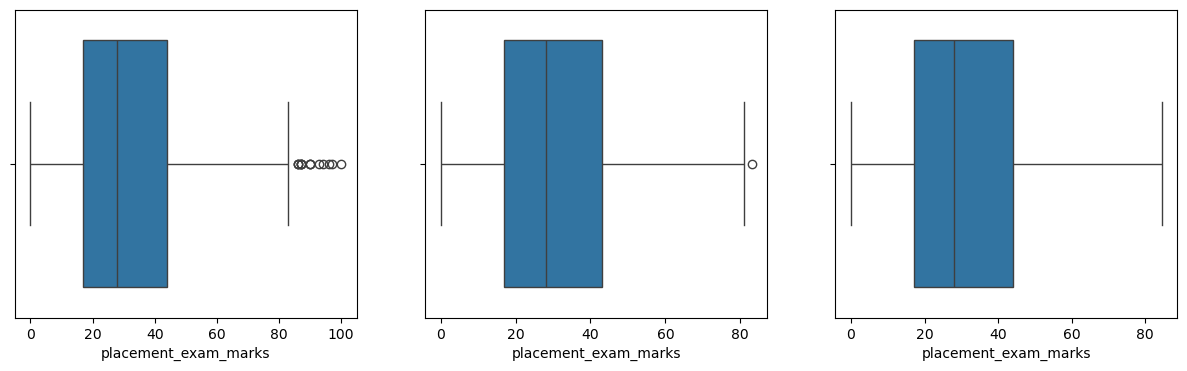

In [17]:
plt.figure(figsize= (15,4))

plt.subplot(131)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(132)
sns.boxplot(x = new_df['placement_exam_marks'])

plt.subplot(133)
sns.boxplot(x = new_df_cap['placement_exam_marks'])